# Project 2: Data Representations and Clustering
#### Serena Tang, Liwen Yang, Winston Wang

### Clustering with Sparse Text Representations

*1. Generate sparse TF-IDF representations: Following the steps in Project 1, transform the documents into TF-IDF vectors. Use min df = 3, exclude the stopwords (no need to do stemming or lemmatization), and remove the headers and footers. No need to do any additional data cleaning.*

In [1]:
from sklearn.datasets import fetch_20newsgroups

# get dataset
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                  'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(categories=categories, remove=('headers', 'footers', 'quotes'))

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# count vectorizer on corpus
tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english')
newsgroups_vectorized = tf_vectorizer.fit_transform(newsgroups.data)

# count vector to TF-IDF
transformer = TfidfTransformer()
newsgroups_tfidf = transformer.fit_transform(newsgroups_vectorized)

print('Newsgroups TF-IDF Dimensions: ', newsgroups_tfidf.shape)

Newsgroups TF-IDF Dimensions:  (4732, 13477)


### QUESTION 1
- ***Report the dimensions of the TF-IDF matrix you obtain.***
    - The newsgroups TF-IDF matrix had a dimension of (4732, 13477). 

*2. Clustering: Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random state, max iter and n init. Please use `random state=0`, `max iter ≥1000`, and `n_init ≥30`. You can refer to sklearn - Clustering text documents using k-means for a basic work flow.*
- *(a) Given the clustering result and ground truth labels, contingency table A is the matrix whose entries $A_{ij}$ is the number of data points that belong to the i’th class and the j’th cluster.*

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Get clusters
kmeans = KMeans(random_state=0, n_clusters=2, max_iter=1000, n_init=30)
kmeans.fit(newsgroups_tfidf )

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [4]:
# Map the categories to classes
class_1 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
class_2=['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
category_to_class=[]
cat_to_num={}
for idx, cat in enumerate(newsgroups.target_names):
    cat_to_num[idx]=cat
for num in newsgroups.target:
    if 'comp.' in cat_to_num[num]:
        category_to_class.append(0)
    else:
        category_to_class.append(1)



<Figure size 640x480 with 0 Axes>

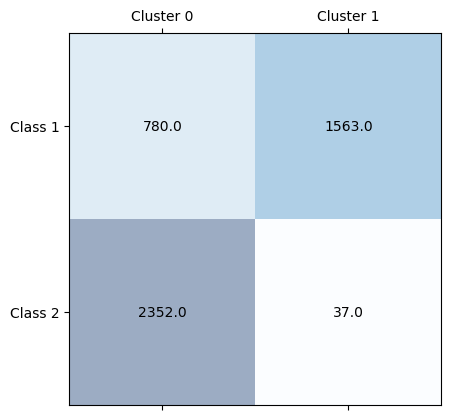

In [5]:
from sklearn import metrics

# plot contingency matrix
fig = plt.figure()
cont_matrix = metrics.cluster.contingency_matrix(category_to_class, kmeans.labels_)
plt.matshow(cont_matrix, cmap=plt.cm.Blues, alpha=0.4)
for (i, j), z in np.ndenumerate(cont_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xticks(range(2), ['Cluster 0', 'Cluster 1'])
plt.yticks(range(2), ['Class 1', 'Class 2'])
plt.show()


### QUESTION 2

***Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to
be square-shaped?***
- The contingency table of the clustering result is shown above. Based on the strong diagonal, we can infer that `Cluster 1` correlates to `Class 1` and `Cluster 0` correlates to `Class 2`. The contingency matrix should be square-shaped as we set the number of clusters in Kmeans to be 2 and our data has 2 classes. If we set the number of clusters in Kmeans to be a different number than the number of classes in the data, the contingency matrix will not be square. 